In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from ulda import ulda, ulda_feature_reduction

In [49]:
df = pd.read_csv('features.csv', index_col=0)
df

,class,subject,muscles,WL_imf1,WL_imf2,WL_imf3,WL_imf4,WL_imf5,WL_imf6,WL_imf7,...,MFD_imf4,MFD_imf5,MIF_imf1,MIF_imf2,MIF_imf3,MIF_imf4,MIF_imf6,PPSD_imf1,PPSD_imf4,PPSD_imf8
0,ALS,N2001A04DE02,Deltoideus,15986.747773,18029.253501,9867.405061,2922.501035,837.065935,291.306787,94.208569,...,0.006665,0.041973,-0.073852,-2.534831e-15,1.809792e-14,-2.410200e-15,7.866846e-15,6.271584,6.278009,6.281050
1,ALS,N2001A05DE59,Deltoideus,15588.593377,15321.368436,9182.041655,3774.715147,1418.216554,481.535562,145.136794,...,-0.123511,-0.087783,-2.519730,-5.734660e-15,-5.380442e-14,6.145066e-15,-2.887997e-14,6.269696,6.276535,6.281304
2,ALS,N2001A04DE01,Deltoideus,35133.525473,42430.501016,24239.343570,10040.459621,3067.042176,1127.826299,521.669895,...,-0.043072,-1.145139,0.791534,-7.740396e-15,-5.042511e-14,3.957156e-14,-1.477197e-13,6.258723,6.267349,6.280977
3,ALS,N2001A04DE05,Deltoideus,23242.789426,27463.061661,16683.195546,6760.780882,2782.092011,1484.280312,665.891264,...,0.150210,-0.169451,1.321410,5.286038e-14,1.353655e-14,6.739061e-15,-2.169041e-14,6.264780,6.274103,6.282455
4,ALS,N2001A04DE06,Deltoideus,13542.339245,18699.883213,12224.763926,5137.823941,1841.874309,513.409359,162.726659,...,0.013598,-1.359414,-0.154473,-9.772264e-14,1.139697e-13,1.273688e-13,0.000000e+00,6.279440,6.273351,6.281437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,HealthyControls,N2001C03BB52,BicepsBrachii_long_head,48848.629205,49699.824953,27407.378838,12833.149434,2962.055831,963.763262,375.611158,...,-2.078882,-0.015565,0.518981,-5.483663e-14,3.399318e-14,1.804427e-13,-6.988793e-14,6.259628,6.264675,6.281837
913,HealthyControls,N2001C03BB56,BicepsBrachii_long_head,36209.643519,29149.550144,18838.590108,7639.041204,2337.932987,697.072308,260.865492,...,-0.011564,-0.004170,-0.132378,-2.408109e-14,-5.851124e-14,-6.271957e-14,3.859641e-14,6.232539,6.265397,6.281714
914,HealthyControls,N2001C07BB71,BicepsBrachii_long_head,5621.442020,4834.828654,3163.985802,1527.230825,442.622846,107.917455,33.669700,...,0.014510,0.074371,-0.004210,-6.384078e-16,-2.005246e-15,-1.068263e-14,3.943310e-15,6.261924,6.274144,6.281626
915,HealthyControls,N2001C10BB70,BicepsBrachii_long_head,20146.053461,20563.122778,10994.039367,3920.158974,1111.811853,345.191513,82.999576,...,-0.270208,-0.032158,-0.001033,-2.959221e-15,-1.571488e-14,-2.991775e-14,-1.237721e-15,6.236197,6.278324,6.281158


In [62]:
df_clean = df.dropna(how='any')

data_classes = pd.factorize(df_clean['class'])[0]
data_feat = np.array(df_clean[df_clean.columns[3:]])
data_feat = (data_feat - np.mean(data_feat, axis=0)) / np.std(data_feat, axis=0)
df_clean

,class,subject,muscles,WL_imf1,WL_imf2,WL_imf3,WL_imf4,WL_imf5,WL_imf6,WL_imf7,...,MFD_imf4,MFD_imf5,MIF_imf1,MIF_imf2,MIF_imf3,MIF_imf4,MIF_imf6,PPSD_imf1,PPSD_imf4,PPSD_imf8
0,ALS,N2001A04DE02,Deltoideus,15986.747773,18029.253501,9867.405061,2922.501035,837.065935,291.306787,94.208569,...,0.006665,0.041973,-0.073852,-2.534831e-15,1.809792e-14,-2.410200e-15,7.866846e-15,6.271584,6.278009,6.281050
1,ALS,N2001A05DE59,Deltoideus,15588.593377,15321.368436,9182.041655,3774.715147,1418.216554,481.535562,145.136794,...,-0.123511,-0.087783,-2.519730,-5.734660e-15,-5.380442e-14,6.145066e-15,-2.887997e-14,6.269696,6.276535,6.281304
2,ALS,N2001A04DE01,Deltoideus,35133.525473,42430.501016,24239.343570,10040.459621,3067.042176,1127.826299,521.669895,...,-0.043072,-1.145139,0.791534,-7.740396e-15,-5.042511e-14,3.957156e-14,-1.477197e-13,6.258723,6.267349,6.280977
3,ALS,N2001A04DE05,Deltoideus,23242.789426,27463.061661,16683.195546,6760.780882,2782.092011,1484.280312,665.891264,...,0.150210,-0.169451,1.321410,5.286038e-14,1.353655e-14,6.739061e-15,-2.169041e-14,6.264780,6.274103,6.282455
4,ALS,N2001A04DE06,Deltoideus,13542.339245,18699.883213,12224.763926,5137.823941,1841.874309,513.409359,162.726659,...,0.013598,-1.359414,-0.154473,-9.772264e-14,1.139697e-13,1.273688e-13,0.000000e+00,6.279440,6.273351,6.281437
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
912,HealthyControls,N2001C03BB52,BicepsBrachii_long_head,48848.629205,49699.824953,27407.378838,12833.149434,2962.055831,963.763262,375.611158,...,-2.078882,-0.015565,0.518981,-5.483663e-14,3.399318e-14,1.804427e-13,-6.988793e-14,6.259628,6.264675,6.281837
913,HealthyControls,N2001C03BB56,BicepsBrachii_long_head,36209.643519,29149.550144,18838.590108,7639.041204,2337.932987,697.072308,260.865492,...,-0.011564,-0.004170,-0.132378,-2.408109e-14,-5.851124e-14,-6.271957e-14,3.859641e-14,6.232539,6.265397,6.281714
914,HealthyControls,N2001C07BB71,BicepsBrachii_long_head,5621.442020,4834.828654,3163.985802,1527.230825,442.622846,107.917455,33.669700,...,0.014510,0.074371,-0.004210,-6.384078e-16,-2.005246e-15,-1.068263e-14,3.943310e-15,6.261924,6.274144,6.281626
915,HealthyControls,N2001C10BB70,BicepsBrachii_long_head,20146.053461,20563.122778,10994.039367,3920.158974,1111.811853,345.191513,82.999576,...,-0.270208,-0.032158,-0.001033,-2.959221e-15,-1.571488e-14,-2.991775e-14,-1.237721e-15,6.236197,6.278324,6.281158


In [63]:
red_feat = ulda_feature_reduction(data_feat, data_classes, 2)
nfeat = (red_feat - np.mean(red_feat, axis=0)) / np.std(red_feat, axis=0)

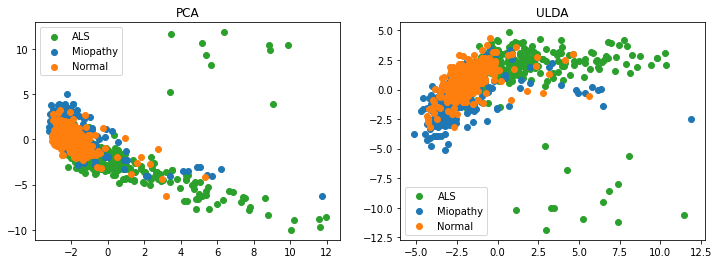

In [65]:
def legend_without_duplicate_labels(ax):
  hand, labl = ax.get_legend_handles_labels()
  handout = []
  lablout = []
  for h, l in zip(hand, labl):
    if l not in lablout:
      lablout.append(l)
      handout.append(h)
  ax.legend(handout, lablout)

fig, ax = plt.subplots(1, 2, figsize=(12, 4))

colors = ['tab:green', 'tab:blue', 'tab:orange']
labels = ['ALS', 'Miopathy', 'Normal']

# PCA plot
U1, D1, V1 = np.linalg.svd(data_feat)

for i in range(data_feat.shape[0]):
  pc0 = V1[0, :] @ data_feat[i, :].T
  pc1 = V1[1, :] @ data_feat[i, :].T
  
  if np.abs(pc0) >= 12 or np.abs(pc1) >= 12: continue
  
  ax[0].scatter(pc0, pc1, c=colors[data_classes[i]], label=labels[data_classes[i]])
  ax[0].set_title('PCA')

# ULDA plot
for i, data in enumerate(red_feat):
  if np.abs(data[0]) >= 12 or np.abs(data[1]) >= 12: continue
  ax[1].scatter(data[0], data[1], c=colors[data_classes[i]], label=labels[data_classes[i]])
  ax[1].set_title('ULDA')
    
legend_without_duplicate_labels(ax[0])
legend_without_duplicate_labels(ax[1])
fig.savefig('fig/reduction.png')

In [31]:
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier



array(['ALS', 'Miopathy', 'Normal'], dtype='<U8')

['ALS',
 'ALS',
 'ALS',
 'ALS',
 'ALS',
 'ALS',
 'ALS',
 'ALS',
 'ALS',
 'ALS',
 'ASS',
 'ASS',
 'ASS',
 'ASS',
 'ASS']